## Approximate Counting: Morris Algorithm

In [1]:
import math
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import math
sns.set()

In [2]:
# Morris's Algorithm
def Morris(n):
    X = 0
    for i in range(n):
        prob = 1/(2**X)
        X += np.random.choice([1, 0], p=[prob, 1-prob])
    return (2**X)-1



In [3]:
# parameters
def calc_params(eps=0.01, delta=0.01):
    
    s = 1/(eps**2)
    t = math.log(1/delta, 2)
    
    return s, t
    


In [4]:
# Morris+ Algorithm
def Morris_plus(n, s):
    results = 0
    for i in range(int(s)):
        results += Morris(n)
    return results/int(s)



In [5]:
# Morris++ Algorithm
def Morris_plus_plus(n, s, t):
    means_list = []
    for i in range(int(t)):
        means_list.append(Morris_plus(n, s))
    means_list.sort()
    return means_list[len(means_list)//2]



## Part a

In [6]:
n = 1000
s, t = calc_params(eps=0.1, delta=0.1)
print("Approx value by Morris's algorithm: ", Morris(n=n))
print("Approx value by Morris+ algorithm: ", Morris_plus(n=n, s=s))
print("Approx value by Morris++ algorithm: ", Morris_plus_plus(n=n, s=s, t=t))

Approx value by Morris's algorithm:  1023
Approx value by Morris+ algorithm:  985.5050505050505
Approx value by Morris++ algorithm:  950.5959595959596


## Part b
In this part, we present the values for Morris, Morris+ and Morris++ for two different parameter settings. We compute value of parameters $s$ and $t$ using the epsilon and delta. Morris+ and Morris++ performs significantly better than Morris. 

In [7]:
print('Parameter Setting 1 (eps=0.1, delta=0.1)')
n = 100
s, t = calc_params(eps=0.1, delta=0.1)
print("Approx value by Morris's algorithm: ", Morris(n=n))
print("Approx value by Morris+ algorithm: ", Morris_plus(n=n, s=s))
print("Approx value by Morris++ algorithm: ", Morris_plus_plus(n=n, s=s, t=t))

print('\n\nParameter Setting 2 (eps=0.05, delta=0.05)')
s, t = calc_params(eps=0.05, delta=0.05)
print("Approx value by Morris's algorithm: ", Morris(n=n))
print("Approx value by Morris+ algorithm: ", Morris_plus(n=n, s=s))
print("Approx value by Morris++ algorithm: ", Morris_plus_plus(n=n, s=s, t=t))

Parameter Setting 1 (eps=0.1, delta=0.1)
Approx value by Morris's algorithm:  127
Approx value by Morris+ algorithm:  98.39393939393939
Approx value by Morris++ algorithm:  103.08080808080808


Parameter Setting 2 (eps=0.05, delta=0.05)
Approx value by Morris's algorithm:  63
Approx value by Morris+ algorithm:  98.36842105263158
Approx value by Morris++ algorithm:  101.89724310776943


## Part c and d
In this section, we run the three algorithms (Morris, Moriss+ and Morris+) for different parameter setting for multiple iterations. Plots of average relative error ($\frac{|\tilde{n} - n|}{n}$) are shown for each algorithm. It's obvious taking means over multiple copies in Morris+ provides a big improvement over the Morris algorithm.
And in case of Morris++, for the same epsilon, increasing the success probability improves our estimate but at the cost of running more copies of Morris+. 
Observe that the estimates, especially for Morris+ and Morris++ are generally better than what theory suggests. These algorthms tend to work really well in practice.



Parameter setting (eps=0.1 and delta=0.1)
Average relative error for Morris: 0.5268
Average relative error for Morris+: 0.05876363636363637
Average relative error for Morris++: 0.032775757575757576
Empirical Success probability for Morris+: 0.86
Empirical Success probability for Morris++: 0.98


Parameter setting (eps=0.1 and delta=0.05)
Average relative error for Morris: 0.45320000000000005
Average relative error for Morris+: 0.05159999999999999
Average relative error for Morris++: 0.03558383838383837
Empirical Success probability for Morris+: 0.86
Empirical Success probability for Morris++: 0.94


Parameter setting (eps=0.05 and delta=0.1)
Average relative error for Morris: 0.5284
Average relative error for Morris+: 0.029550877192982456
Average relative error for Morris++: 0.01692932330827068
Empirical Success probability for Morris+: 0.94
Empirical Success probability for Morris++: 1.0


Parameter setting (eps=0.05 and delta=0.05)
Average relative error for Morris: 0.5128
Average 

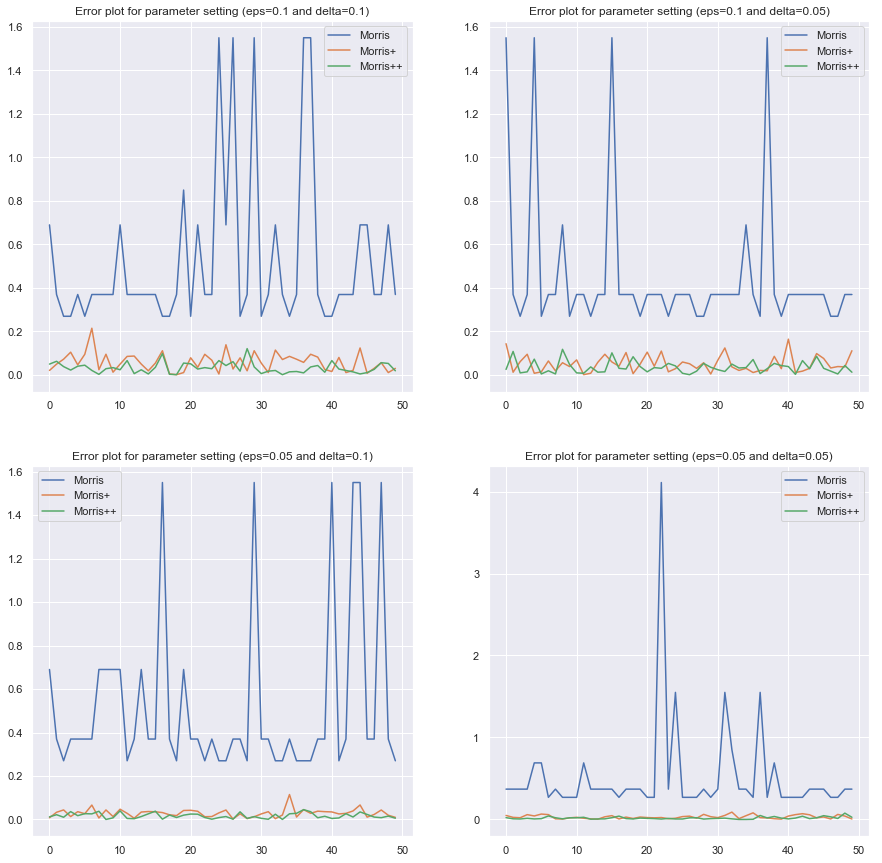

In [8]:
fig_err, axes_err = plt.subplots(2, 2, figsize=(15,15))
num_iter = 50
n = 100
epsilons = [0.1, 0.05]
deltas = [0.1, 0.05]
for i in range(len(epsilons)):
    for j in range(len(deltas)):
        morris_list = []
        morris_plus_list = []
        morris_plus_plus_list = []
        morris_acc = []
        morris_plus_acc = []
        morris_plus_plus_acc = []
        for k in range(num_iter):
                # Compute the absolute error 
                s, t = calc_params(eps=epsilons[i], delta=deltas[j])
                morris_list.append( abs(Morris(n=n) - n)/n )
                morris_plus_list.append( abs(Morris_plus(n=n, s=s) - n)/n )
                morris_plus_plus_list.append( abs(Morris_plus_plus(n=n, s=s, t=t) - n)/n )

                # Compute whether it's a success(1) or failure(0)
                morris_acc.append(1 if morris_list[k] <= epsilons[i] else 0)
                morris_plus_acc.append(1 if morris_plus_list[k] <= epsilons[i] else 0)
                morris_plus_plus_acc.append(
                    1 if morris_plus_plus_list[k] <= epsilons[i] else 0)
                
        axes_err[i][j].set_title(
            f'Error plot for parameter setting (eps={epsilons[i]} and delta={deltas[j]})')
        axes_err[i][j].plot(morris_list)
        axes_err[i][j].plot(morris_plus_list)
        axes_err[i][j].plot(morris_plus_plus_list)
        axes_err[i][j].legend(['Morris', 'Morris+', 'Morris++'])
        
        print(f'\n\nParameter setting (eps={epsilons[i]} and delta={deltas[j]})')
        print(f'Average relative error for Morris: {np.mean(morris_list)}')
        print(f'Average relative error for Morris+: {np.mean(morris_plus_list)}')
        print(f'Average relative error for Morris++: {np.mean(morris_plus_plus_list)}')
        
        print(f'Empirical Success probability for Morris+: {np.mean(morris_plus_acc)}')
        print(f'Empirical Success probability for Morris++: {np.mean(morris_plus_plus_acc)}')
        
           
                
        
                
                


## Counting distinct elements in a stream : FM Algorithm

In [9]:
import numpy as np
import random
import math

In [10]:
# 'm' is the number of lements of the stream
# 'n' is the universe (domain) for the stream
m = 1000
n = 100

In [11]:
# Building random hash function
def build_hash():
    hash_func = {}
    for i in range(1, n+1):
        hash_func[int(i)] = random.uniform(0, 1)
    return hash_func

In [12]:
# FM Algorithm
def FM():
    hash_func = build_hash()
    min_x = 2
    for i in range(m):
        x = np.random.choice(n-1) + 1
        x = hash_func[int(x)]
        if x < min_x:
            min_x = x
    return min_x
print("Number of distinct elements by FM algorithm: ", (1/FM())-1)

Number of distinct elements by FM algorithm:  713.8900152814464


In [13]:
# parameters
epsilon = 0.01
delta = 0.01
s = 1/(epsilon**2)
t = math.log(1/delta, 2)

In [14]:
# FM+ Algorithm
def FM_plus():
    results = 0
    for i in range(int(s)):
        results += FM()
    return (int(s)/results) - 1
print("Number of distinct elements by FM algorithm: ", FM_plus())

Number of distinct elements by FM algorithm:  99.6861918821841


In [15]:
# FM++ Algorithm
def FM_plus_plus():
    means_list = []
    for i in range(int(t)):
        means_list.append(FM_plus())
    means_list.sort()
    return means_list[len(means_list)//2]
print("Number of distinct elements by FM algorithm: ", FM_plus_plus())

Number of distinct elements by FM algorithm:  98.98169288419709


## Estimate of l2-Norm : AMS Algorithm

In [16]:
import numpy as np
import random
import math

In [17]:
# 'm' is the number of lements of the stream
# 'n' is the universe (domain) for the stream
m = 1000
n = 100

In [18]:
# Initialize 'Y's
def Y_distribution():
    y_dist = {}
    for i in range(1, n+1):
        y_dist[i] = np.random.choice([1, -1], p=[0.5, 0.5])
    return y_dist

In [19]:
def AMS():
    Z = 0
    y_dist = Y_distribution()
    for i in range(m):
        x = np.random.choice(n-1) + 1
        Z += y_dist[x]
    return Z**2
print("l2 norm estimation by AMS algorithm: ", AMS())

l2 norm estimation by AMS algorithm:  324


In [20]:
epsilon = 0.01
delta = 0.01
s = 1/(epsilon**2)
t = math.log(1/delta, 2)

In [21]:
# AMS+ Algorithm
def AMS_plus():
    results = 0
    for i in range(int(s)):
        results += AMS()
    return results/int(s)
print("l2 norm estimation by AMS algorithm: ", AMS_plus())

l2 norm estimation by AMS algorithm:  11210.9224


In [22]:
# Morris++ Algorithm
def AMS_plus_plus():
    means_list = []
    for i in range(int(t)):
        means_list.append(AMS_plus())
        means_list.sort()
    return means_list[len(means_list)//2]
print("l2 norm estimation by AMS algorithm: ", AMS_plus_plus())

l2 norm estimation by AMS algorithm:  11241.4924
